In [2]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import pytesseract
pytesseract.pytesseract.tesseract_cmd=r"F:\tesseract\tesseract.exe"
image = cv2.imread(filename = "test42.jpeg")

In [3]:
#https://stackoverflow.com/questions/28816046/
#displaying-different-images-with-actual-size-in-matplotlib-subplot
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

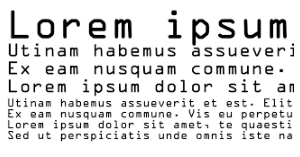

In [5]:
### To view The Image: -
# display("test42.jpeg")
display("images1.png")

###  To Know the Height  and Width of An Image:-


In [7]:
image  = cv2.imread(filename = 'images1.png')
height, width = image.shape[:2]
print("The height of the Image is {0} and the width is {1}". format (height , width))

The height of the Image is 159 and the width is 318


### Inverted Image  

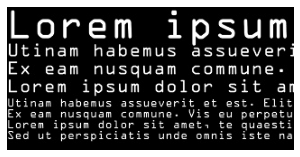

In [9]:
inverted_image = cv2.bitwise_not(src = image)
cv2.imwrite("inverted.jpg", inverted_image)
display("inverted.jpg")

### Rescaling: 

In [10]:
## We Will do this in next topic


### Binarization 

In [18]:
def gray_scale(image):
    '''Image saurce is required'''
    return(cv2.cvtColor(src=image , code= cv2.COLOR_BGR2GRAY))

In [19]:
gray_image = gray_scale(image)
cv2.imwrite("gray.jpg", gray_image)

True

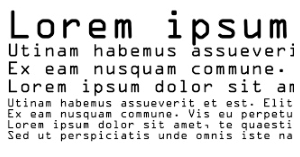

In [20]:
display("gray.jpg")

In [21]:
# thresh , im_bw = cv2.threshold(src=image, thresh=200 , maxval=255, type = cv2.THRESH_BINARY )

# cv2.imwrite("bw_image.jpg", im_bw)

In [22]:
thresh , im_bw = cv2.threshold(src = image , thresh = 200, maxval = 255, type= cv2.THRESH_BINARY)
cv2.imwrite("bw_image.jpg", im_bw)

True

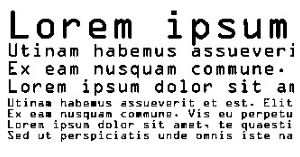

In [23]:
display("bw_image.jpg")


### Noise Removal
  

In [72]:
def noise_removal(image):
    '''Image saurce is Required'''
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
#     image = cv2.medianBlur(image, 3)
    
    #Gauusian kernel for sharpening
    gaussian_blur = cv2.GaussianBlur(src=image, ksize=(3,3), sigmaX=1)

    #Sharpening using addweighted()
    sharpened1 = cv2.addWeighted(image,1.5, gaussian_blur, -0.5, 0)
    sharpened2 = cv2.addWeighted(image,3.5, gaussian_blur, -2.5, 0)
    sharpened3 = cv2.addWeighted(image,7.5, gaussian_blur, -6.5, 0)

    return (sharpened3)

In [73]:
no_noise = noise_removal(im_bw)
cv2.imwrite("no_noise.jpg", no_noise)

True

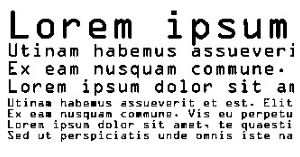

In [74]:
display("no_noise.jpg")

### Dilation and Erosion:- 


In [81]:
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((1,1),np.uint8)
    image = cv2.erode(image, kernel, iterations=4)
    image = cv2.bitwise_not(image)
    return (image)

In [82]:
eroded_image = thin_font(no_noise)
cv2.imwrite("eroded_image.jpg", eroded_image)

True

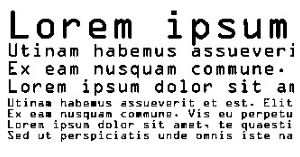

In [83]:
display("eroded_image.jpg")


In [87]:
def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((1,1),np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [88]:
dilated_image = thick_font(no_noise)
cv2.imwrite("dilated_image.jpg", dilated_image)

True

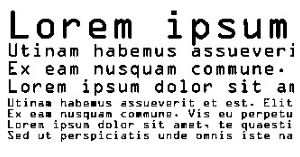

In [89]:
display("dilated_image.jpg")


In [90]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd=r"F:\tesseract\tesseract.exe"

In [91]:
text = pytesseract.image_to_string(image = dilated_image)
print(text)

Lorem ipsum

Utinam habemus assuever:
Ex eam nusquam commune.

Lorem ipsum dolor sit ar
Utinaa habemus assueverit et est. Elit
Ex eam nusquan commune. Vis eu perpetu

Loren ipsum dolar sit amet, te quaesti
Sed ut perspiciatis unde omnis iste na



Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelector

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelector

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelector

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelector

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelector

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelector

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelector

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelector

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelector

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelector

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelector

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelector

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelector

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelector

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelector

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelector

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelector

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelector

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelector

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelector

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelector

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelector

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelector

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelector

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelector

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelector

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "F:\Anaconda\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "F:\Anaconda\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelector